<a href="https://colab.research.google.com/github/jameseconnolly/jameseconnolly.github.io/blob/main/GHGAgainstCountryCCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# // Import pandas for exporting/importing and math for log of GHG
import pandas as pd
import math

In [4]:
df = pd.read_csv('Net_Zero_Countries.csv')

In [7]:
# // Retain relevant columns
df1 = df.loc[:, ['Country Name', 'Country Code','population','GHG','Net-zero Target']]

In [8]:
df2 = pd.read_csv('CCS_Index.csv')

In [9]:
# // Combine my net-zero data and CCS data using concat
df_concat = pd.concat([df1, df2], axis=1)

In [10]:
df_concat1 = df_concat.loc[:, ['Country Name', 'Country Code','population','GHG','Net-zero Target', 'Carbon Capture Requirement']]

In [11]:
# // Dropping countries which had no CCS requirement data
df_concat2=df_concat1.dropna(subset=['Carbon Capture Requirement'])

In [12]:
# // Using math to log GHG. Original GHG values greatly varied in value so logarithmic y-axis was necessary
df_concat2['log_GHG'] = df_concat2['GHG'].apply(lambda x: math.log(x))

<ipython-input-12-ae114b39de75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat2['log_GHG'] = df_concat2['GHG'].apply(lambda x: math.log(x))


In [13]:
df_concat2

,Country Name,Country Code,population,GHG,Net-zero Target,Carbon Capture Requirement,log_GHG
1,Angola,AGO,34503774.0,128290000.0,2030.0,3.0,18.669804
2,Argentina,ARG,45276780.0,398910000.0,2050.0,14.0,19.804246
5,Austria,AUT,8922082.0,69800000.0,2050.0,24.0,18.061145
6,Belgium,BEL,11611420.0,108220000.0,2050.0,28.0,18.499677
9,Bangladesh,BGD,169356251.0,237700000.0,2050.0,33.0,19.286520
...,...,...,...,...,...,...,...
188,Turkey,TUR,84775404.0,459860000.0,2053.0,43.0,19.946433
190,Ukraine,UKR,43531422.0,221290000.0,2060.0,49.0,19.214985
191,Uzbekistan,UZB,34081449.0,185390000.0,2030.0,38.0,19.037972
192,Venezuela,VEN,28199867.0,299600000.0,2030.0,14.0,19.517959


In [19]:
df_concat2.to_csv('Carbon_Capture_Requirement.csv', index=False)

In [20]:
# //  Easy way to check all net-zero targets, so I know what to filter my data by using picked_store in vega-lite visualisation
df_concat2['Net-zero Target'].unique().tolist()

[2030.0,
 2050.0,
 2045.0,
 2035.0,
 2000.0,
 2040.0,
 nan,
 2060.0,
 2070.0,
 2065.0,
 2053.0]

In [21]:
# //  Checking range of population to adjust data-points to population size
min_value = df_concat2['population'].min()
print(min_value)

370335.0


In [22]:
max_value = df_concat2['population'].max()
print(max_value)

1407563842.0


In [32]:
df_concat2=pd.read_csv('Carbon_Capture_Requirement.csv')

In [33]:
df_concat2

,Country Name,Country Code,population,GHG,Net-zero Target,Carbon Capture Requirement,log_GHG
0,Angola,AGO,34503774.0,128290000.0,2030.0,3.0,18.669804
1,Argentina,ARG,45276780.0,398910000.0,2050.0,14.0,19.804246
2,Austria,AUT,8922082.0,69800000.0,2050.0,24.0,18.061145
3,Belgium,BEL,11611420.0,108220000.0,2050.0,28.0,18.499677
4,Bangladesh,BGD,169356251.0,237700000.0,2050.0,33.0,19.286520
...,...,...,...,...,...,...,...
80,Turkey,TUR,84775404.0,459860000.0,2053.0,43.0,19.946433
81,Ukraine,UKR,43531422.0,221290000.0,2060.0,49.0,19.214985
82,Uzbekistan,UZB,34081449.0,185390000.0,2030.0,38.0,19.037972
83,Venezuela,VEN,28199867.0,299600000.0,2030.0,14.0,19.517959


In [42]:
# //  Importing matplotlib for regression line
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

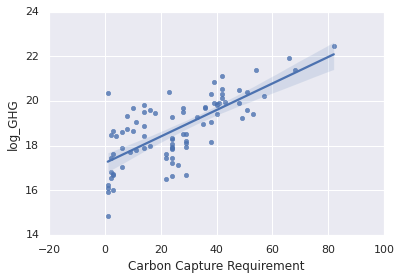

In [43]:
# //  Import seaborn which acts as library that uses Matplotlib underneath to plot graphs.
import seaborn as sns
sns.set()
sns.regplot(x='Carbon Capture Requirement',y='log_GHG',data=df_concat2)

In [44]:
from scipy.stats import linregress

In [45]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=df_concat2['Carbon Capture Requirement'], y=df_concat2['log_GHG'])

In [46]:
# //  Calculated line of best fit, vega-lite has calculated r squared 
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))

y =  0.06  * x +  17.22
